In [76]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import statistics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import os

In [77]:
path = os.getcwd()
iris_df = pd.read_csv(path+'\\Learn Dataset\\iris_dataset_missing.csv')
iris_df_nona = iris_df.dropna()
iris_df_nona["Class"] = list(iris_df_nona.loc[:,"species"].values)
iris_df_nona["Class"]=iris_df_nona["Class"].replace("Iris-versicolor",0).replace("Iris-setosa",1).replace("Iris-virginica",2)

heart_df = pd.read_csv(path+'\\Learn Dataset\\heart_disease_missing.csv')
heart_df_nona = heart_df.dropna()
features = ["exang","thal","slope","cp","oldpeak"]
heart_df_sub = heart_df_nona.copy()
for i in heart_df_nona.columns:
    if i not in features and i not in ["target"]:
        heart_df_sub.drop(columns = [i], inplace=True)

thal = [round(x) for x in list(heart_df_nona.loc[:,"thal"].values)]
heart_df_nona["thal"] = thal

outlier_ = iris_df_nona[iris_df_nona['petal_width']<0]
iris_df_nona.drop(index = list(outlier_.index), inplace=True)

In [78]:
iris_df_X = iris_df_nona.copy()
iris_df_Y = iris_df_nona.copy()
iris_df_X = iris_df_X.drop(columns=["Class","species"])
iris_df_Y = iris_df_Y.drop(columns=["sepal_length","sepal_width","petal_length","petal_width","species"])

heart_df_X = heart_df_sub.copy().drop(columns=["target"])
heart_df_Y = heart_df_sub.copy().drop(columns=features)

# CM7
## Improved Model
### Iris Dataset
### Methods utilized

Z- Score method for normalization

In [79]:
iris_df_X_norm = iris_df_X.copy()
iris_df_Y_norm = iris_df_Y.copy()
iris_df_X_norm['sepal_length'] = (iris_df_X.loc[:,'sepal_length'] - iris_df_X.describe().loc['mean','sepal_length'])/iris_df_X.describe().loc['std','sepal_length']
iris_df_X_norm['sepal_width'] = (iris_df_X.loc[:,'sepal_width'] - iris_df_X.describe().loc['mean','sepal_width'])/iris_df_X.describe().loc['std','sepal_width']
iris_df_X_norm['petal_length'] = (iris_df_X.loc[:,'petal_length'] - iris_df_X.describe().loc['mean','petal_length'])/iris_df_X.describe().loc['std','petal_length']
iris_df_X_norm['petal_width'] = (iris_df_X.loc[:,'petal_width'] - iris_df_X.describe().loc['mean','petal_width'])/iris_df_X.describe().loc['std','petal_width']

iris_df_X_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-4.684897e-16,-3.233925e-16,1.878839e-16,8.052167e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.740416e+00,-2.495842e+00,-1.571918e+00,-1.561446e+00
25%,-7.962596e-01,-6.114692e-01,-1.282735e+00,-1.150064e+00
50%,-2.196305e-01,-1.234539e-02,2.323769e-01,2.087332e-01
75%,6.706569e-01,4.727660e-01,7.135319e-01,7.995355e-01
max,2.143764e+00,2.687898e+00,1.618390e+00,1.751989e+00


### Weighted KNN method used. Distance metric used is minkowski with p = 3

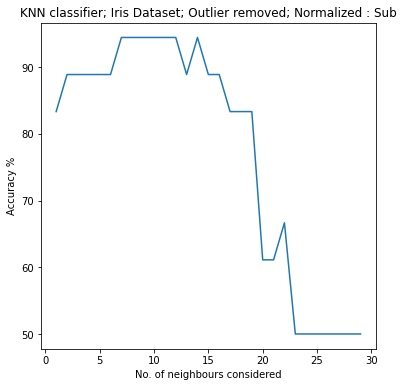

In [80]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    #Does one hot encoding of the Y value
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return sklearn.metrics.roc_auc_score(y_test, y_pred, average='macro')

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(iris_df_X_norm, iris_df_Y_norm, test_size = 0.4, random_state = 275)
X_val, X_test, Y_val, Y_test = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=3)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))+1
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric = 'minkowski', p=3)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = multiclass_roc_auc_score(Y_test,Y_pred)
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='macro')

In [81]:
print('Best k is...',best_k)

Best k is... 7


In [82]:
print('AUC Score; K =',best_k,'; IRIS  ...',auc_score)
print('Accuracy; K =',best_k,' IRIS  ...',aucc_score)
print('F-score; K =',best_k,'IRIS ...', f_score)

AUC Score; K = 7 ; IRIS  ... 1.0
Accuracy; K = 7  IRIS  ... 1.0
F-score; K = 7 IRIS ... 1.0


An improvement from 0.9 to 1.0

## Heart Disease Dataset

### Normalization

Z-score Normalization method is used

In [83]:
heart_df_X_norm = heart_df_X.copy()
for i in heart_df_X.columns:
    heart_df_X_norm[i] = (heart_df_X.loc[:,i] - heart_df_X.describe().loc['mean',i])/heart_df_X.describe().loc['std',i]
heart_df_Y_norm = heart_df_Y.copy()
heart_df_X_norm.describe()

,cp,exang,oldpeak,slope,thal
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,1.276118e-17,1.531342e-17,-1.480297e-16,-2.041789e-17,-2.373580e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.334621e-01,-7.605750e-01,-9.945207e-01,-2.201188e+00,-2.432272e+00
25%,-9.334621e-01,-7.605750e-01,-8.125217e-01,-6.250287e-01,-6.320433e-01
50%,5.091611e-02,-7.605750e-01,-3.283925e-01,-6.250287e-01,-4.462435e-01
75%,1.035294e+00,1.307238e+00,5.062250e-01,9.511306e-01,1.007554e+00
max,2.019673e+00,1.307238e+00,3.954056e+00,9.511306e-01,1.507560e+00


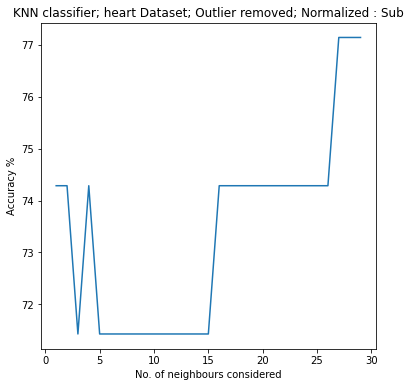

In [84]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X_norm, heart_df_Y_norm, test_size = 0.4, random_state = 275)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k,weights='distance', metric = 'euclidean')
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; heart Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))+1

In [85]:
print('Best K is...', best_k)

Best K is... 27


In [86]:
knn_model = KNeighborsClassifier(n_neighbors=best_k,weights='distance', metric = 'euclidean')
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = sklearn.metrics.roc_auc_score(Y_test, Y_pred, average='macro')
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='macro')
print('AUC Score; K =',best_k,'; heart distance...',auc_score)
print('Accuracy; K =',best_k,'; heart distance...',aucc_score)
print('F-score; K =',best_k,'; heart distance...', f_score)

AUC Score; K = 27 ; heart distance... 0.8833333333333334
Accuracy; K = 27 ; heart distance... 0.8857142857142857
F-score; K = 27 ; heart distance... 0.8833333333333333


An improvement from 0.75 to 0.883